In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
data_mouse = pd.read_csv(mouse_drug_data_to_load)
data_clinical = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_data = pd.merge(data_clinical, data_mouse, on ="Mouse ID", how ="left")

# Display the data table for preview
combined_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = combined_data.groupby(["Drug","Timepoint"])
grouped_data = grouped_data["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
grouped_data_frameVolume = grouped_data.to_frame()

# Preview DataFrame
grouped_data_frameVolume


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
grouped_data1_frame1 = grouped_data_frameVolume.reset_index()
grouped_data1_frame1

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdError_df = combined_data.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
stdError_dfVol = stdError_df[["Tumor Volume (mm3)"]]
# Preview DataFrame
stdError_dfVol.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
sem_stdErrorVol = stdError_dfVol.reset_index()
sem_stdErrorVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
reformatted_GroupVolume = grouped_data1_frame1.pivot(index ='Timepoint', columns ='Drug', values= "Tumor Volume (mm3)")
reformatted_GroupVolume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


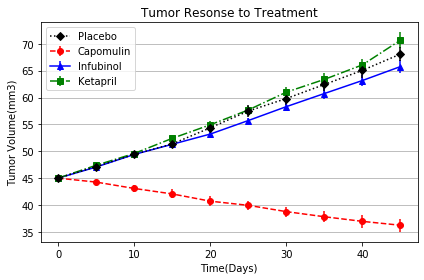

In [7]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)
fig, axis = plt.subplots()

axis.errorbar(x_axis, grouped_data_frameVolume.loc["Capomulin","Tumor Volume (mm3)"],stdError_dfVol.loc["Capomulin","Tumor Volume (mm3)"], fmt = "o", color= "r", ls = "--",label = "Capomulin")
axis.errorbar(x_axis, grouped_data_frameVolume.loc["Infubinol","Tumor Volume (mm3)"], stdError_dfVol.loc["Infubinol","Tumor Volume (mm3)"], fmt = "^", color = "b",ls = "-", label = "Infubinol")
axis.errorbar(x_axis, grouped_data_frameVolume.loc["Ketapril","Tumor Volume (mm3)"], stdError_dfVol.loc["Ketapril","Tumor Volume (mm3)"], fmt = "s", color ="g",ls = "-.", label = "Ketapril" )
axis.errorbar(x_axis, grouped_data_frameVolume.loc["Placebo","Tumor Volume (mm3)"], stdError_dfVol.loc["Placebo","Tumor Volume (mm3)"], fmt ="D", color ="black", ls = ":", Label = "Placebo")
axis.set_xlabel("Time(Days)")
axis.set_ylabel("Tumor Volume(mm3)")
plt.title("Tumor Resonse to Treatment")
axis.yaxis.grid()
axis.legend(loc = "best")
plt.tight_layout()

# Save the Figure
plt.savefig("../Tumor_vol.png")
plt.show()

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_data2 = combined_data.groupby(["Drug","Timepoint"])
grouped_data2 = grouped_data2["Metastatic Sites"].mean()


# Convert to DataFrame
grouped_data_frameresponse = grouped_data2.to_frame()


# Preview DataFrame
grouped_data_frameresponse.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
grouped_data2_frame = grouped_data_frameresponse.reset_index()
grouped_data2_frame.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
grouped_data_frameresponse.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stdError_df = combined_data.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
stdError_dfresponse = stdError_df[["Metastatic Sites"]]

# Preview DataFrame
stdError_dfresponse.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
reformatted_GroupSites = grouped_data2_frame.pivot(index ='Timepoint', columns ='Drug', values= "Metastatic Sites")

In [14]:
reformatted_GroupSites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


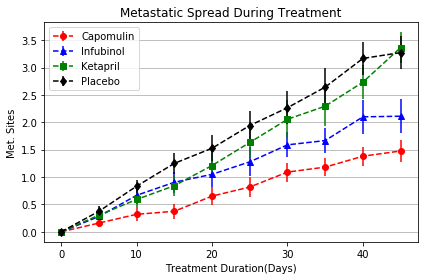

In [15]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)
plt.errorbar(x_axis, grouped_data_frameresponse.loc["Capomulin","Metastatic Sites"],stdError_dfresponse.loc["Capomulin","Metastatic Sites"], fmt ="o", ls ="--", color ="red" )
plt.errorbar(x_axis, grouped_data_frameresponse.loc["Infubinol","Metastatic Sites"],stdError_dfresponse.loc["Infubinol","Metastatic Sites"], fmt = "^", ls = "--", color ="blue")
plt.errorbar(x_axis, grouped_data_frameresponse.loc["Ketapril","Metastatic Sites"],stdError_dfresponse.loc["Ketapril","Metastatic Sites"], fmt = "s", ls ="--", color = "g")
plt.errorbar(x_axis, grouped_data_frameresponse.loc["Placebo","Metastatic Sites"],stdError_dfresponse.loc["Placebo","Metastatic Sites"], fmt ="d", ls ="--", color ="black" )
plt.legend(loc = "best", labels= ["Capomulin", "Infubinol", "Ketapril","Placebo"])
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.grid(axis ='y')
plt.tight_layout()

# Save the Figure
plt.savefig("../Metastatic.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_datacount = combined_data.groupby(["Drug","Timepoint"])
grouped_datacount = grouped_datacount["Mouse ID"].count()
grouped_datacount

# Convert to DataFrame
grouped_data_framecount = grouped_datacount.to_frame()

# Preview DataFrame
grouped_data_framecount.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [17]:
grouped_data3_frame = grouped_data_framecount.reset_index()
grouped_data3_frame.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
reformatted_GroupMice =grouped_data3_frame.pivot(index ='Timepoint', columns ='Drug', values = "Mouse ID")

In [19]:
reformatted_GroupMice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


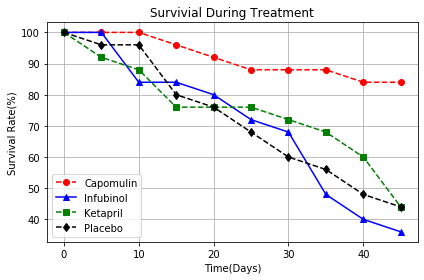

In [20]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, 50 , 5)
plt.plot(x_axis, 100 *grouped_data_framecount.loc["Capomulin", "Mouse ID"]/ 25, marker ="o",color = "red", ls ="--", label="Capomulin")
plt.plot(x_axis, 100*grouped_data_framecount.loc["Infubinol", "Mouse ID"]/ 25, marker ="^", color ="blue", linestyle="-", label ="Infubinol")
plt.plot(x_axis, 100* grouped_data_framecount.loc["Ketapril", "Mouse ID"]/25, marker = "s", color = "green",linestyle="dashed", label ="Ketapril")
plt.plot(x_axis, 100*grouped_data_framecount.loc["Placebo", "Mouse ID"]/25, marker ="d", color = "black", ls ="--", label ="Placebo")
plt.grid()
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survivial During Treatment")
plt.legend(loc ="best")
plt.tight_layout()




# Save the Figure
plt.savefig("../Survival Rates.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
final = reformatted_GroupVolume.iloc[-1]
final
initial = reformatted_GroupVolume.iloc[0]
initial

# Display the data to confirm
percent_change = (final - initial)/ initial
percent_change

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

In [22]:
percent_change = percent_change *100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

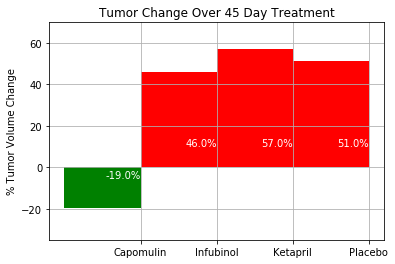

In [23]:
# Store all Relevant Percent Changes into a Tuple
change_Tup =(percent_change[0], percent_change[2], percent_change[3],percent_change[5])
# Splice the data between passing and failing drugs
ticklocation = [0, 1, 2, 3]
plt.bar(ticklocation, change_Tup, width =-1, color =("Green", "red","red","red"), align = "edge" )
plt.xticks(ticklocation, ("Capomulin","Infubinol", "Ketapril", "Placebo"))
plt.ylabel("% Tumor Volume Change")
plt.ylim(-35, 70)
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()
count =0







# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes
for i in change_Tup:
    if i < 0:
        y_coor =-5
    else:
        y_coor =10
    plt.text(count, y_coor, str(round(i,0)) + '%', ha = 'right', color = 'white')
    count += 1
    


# Call functions to implement the function calls


# Save the Figure
plt.savefig("../summaryBar.png")



# Show the Figure
plt.show()